O parâmetro 'binary' é usado para determinar se a correlação deve considerar apenas duas classes (por exemplo, 'fácil' e 'difícil') ou múltiplas classes (como 'fácil', 'médio' e 'difícil').

In [1]:
binary = True

Número de iterações que cada modelo vai fazer na função

In [2]:
n_iter_DecisionTreeRegressor=50
n_iter_SVR=50
n_iter_NuSVR=50
n_iter_RandomForestRegressor=50
n_iter_XGBRegressor=50

# Modelos de Regressão

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, accuracy_score, precision_recall_fscore_support, r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [5]:
ind_vars = pd.read_csv(r'..\code_metrics_professor_util.csv', index_col='question')
ind_vars = ind_vars.fillna(0)

ind_vars

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1640,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1641,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1642,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1643,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,9,1,3.70
1644,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,10,1,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75


In [6]:

dep_vars = pd.read_csv(r'Correlations_CSV\question_info.csv', index_col='question')

dep_vars = dep_vars.fillna(0)
dep_vars

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
question,,,,,,,,,,,
5168,3.642857,0.254902,10.761905,14.404762,2.714286,920.142857,55.166667,30.409308,218.738095,9.30,-0.06
5932,1.600000,0.550000,9.840000,11.440000,0.720000,857.400000,48.440000,4.299818,180.240000,20.00,0.00
6471,1.485714,0.673077,8.628571,10.114286,0.485714,502.657143,27.057143,29.716086,165.257143,14.63,-0.01
6476,1.629630,0.568182,6.407407,8.037037,0.703704,371.925926,20.444444,8.873960,274.259259,14.81,-0.02
5166,2.000000,0.467742,12.451613,14.451613,1.064516,829.387097,56.935484,0.000000,287.193548,12.50,0.08
...,...,...,...,...,...,...,...,...,...,...,...
6248,3.304348,0.276316,11.434783,14.739130,2.391304,908.260870,39.652174,106.956190,235.043478,18.68,0.09
6009,3.105263,0.322034,6.789474,9.894737,2.105263,776.789474,32.842105,18.374211,162.947368,5.56,0.11
6013,1.363636,0.733333,4.909091,6.272727,0.363636,559.818182,26.545455,20.855682,81.681818,0.00,0.05


In [7]:
dep_vars.describe()

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,3.293455,0.356831,10.772595,14.066050,2.358495,1165.482644,58.883957,118.034306,263.649824,15.907373,0.085392
std,2.578058,0.159920,4.773591,6.448178,2.595763,701.372893,36.341844,106.104312,170.604591,10.159736,0.053593
min,1.117647,0.023758,2.571429,4.000000,0.117647,150.481481,7.185185,0.000000,11.800000,0.000000,-0.060000
25%,2.111111,0.240000,7.361111,9.736842,1.142857,739.142857,34.322581,31.760367,164.920000,8.820000,0.050000
50%,2.870968,0.326531,10.000000,13.142857,1.914286,1001.259259,51.033333,92.400545,228.818182,14.290000,0.090000
75%,3.800000,0.454545,13.333333,16.666667,2.862069,1354.259259,74.928571,168.492000,315.666667,20.690000,0.130000
max,34.296296,0.894737,29.281250,58.592593,33.481481,4472.375000,224.343750,519.743200,1158.968750,57.140000,0.210000


In [8]:
ind_vars = ind_vars.astype(np.float64)
dep_vars = dep_vars.astype(np.float64)

In [9]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

def plot_histogram(hst, base_dir="Figures", regression_dir="Regression"):
    """
    Recebe um gráfico de histograma (Axes) e salva em uma pasta específica, dependendo do valor de 'binary'.
    O nome da imagem é baseado no xlabel do gráfico, com espaços convertidos em underscores e caracteres especiais removidos.
    
    Parameters:
        hst (Axes): O objeto de gráfico criado com sns.histplot.
        binary (bool): Se True, o histograma será salvo na subpasta '2'. Se False, será salvo na subpasta '3'.
        base_dir (str): O diretório base para salvar os gráficos. Padrão é "Figures".
        regression_dir (str): O subdiretório base "Regression".
    """
    # Obter o título do gráfico (rótulo de X) e limpar o texto para o nome do arquivo
    xlabel = hst.get_xlabel()  # Obtém o texto do rótulo do eixo X
    filename = re.sub(r'[^a-zA-Z0-9_]', '', xlabel)  # Remove caracteres especiais
    filename = filename.replace(' ', '_')  # Substitui espaços por underscores
    
    # Definir a subpasta (2 ou 3) dependendo de `binary`
    subfolder = "2" if binary else "3"
    
    # Criar diretório para salvar o histograma dentro da subpasta correta
    hist_dir = os.path.join(base_dir, regression_dir, subfolder, "histogram")
    os.makedirs(hist_dir, exist_ok=True)
    
    # Caminho completo do arquivo para salvar
    hist_file_path = os.path.join(hist_dir, f"{filename}.png")

    # Salvar o gráfico
    plt.tight_layout()
    plt.savefig(hist_file_path, bbox_inches='tight')
    print(f"Gráfico do histograma salvo em: {hist_file_path}")
    plt.show()

## Distribuição de frequência

Gráfico do histograma salvo em: Figures\Regression\2\histogram\TaxadeErro.png


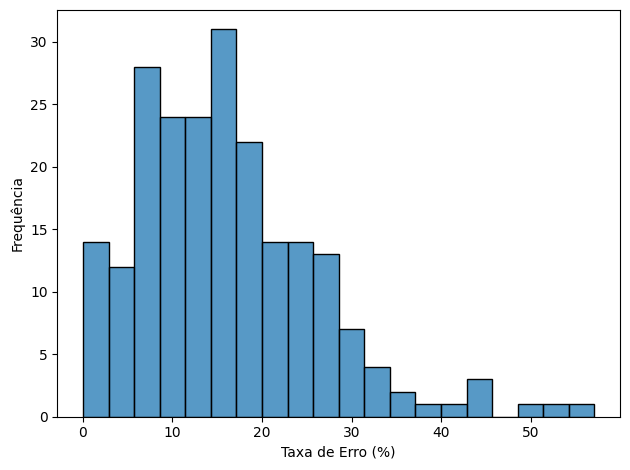

In [10]:
hst = sns.histplot(data=dep_vars['taxa de erro'] , bins=20)
sns.set_palette('dark')
hst.set_xlabel('Taxa de Erro (%)')
hst.set_ylabel('Frequência')

plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

Gráfico do histograma salvo em: Figures\Regression\2\histogram\Tempodeimplementaosegundos.png


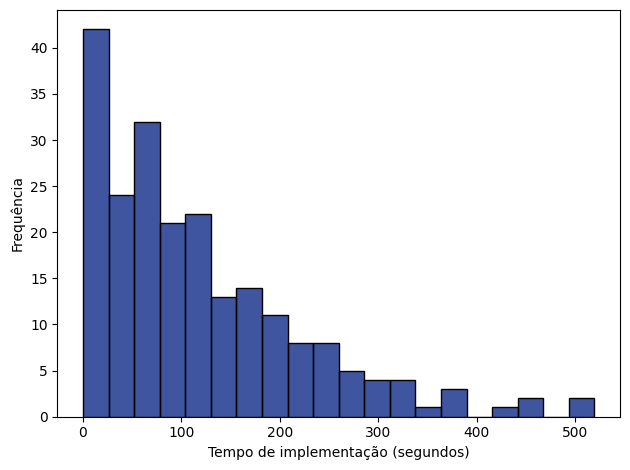

In [11]:
hst = sns.histplot(data=dep_vars['tempo_implementacao'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Tempo de implementação (segundos)')
hst.set_ylabel('Frequência')


plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

Gráfico do histograma salvo em: Figures\Regression\2\histogram\Nmerodeeventos.png


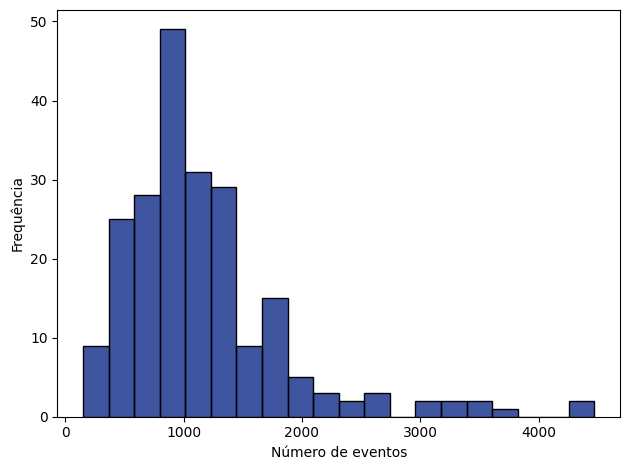

In [12]:
hst = sns.histplot(data=dep_vars['num_eventos'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Número de eventos')
hst.set_ylabel('Frequência')


plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

Gráfico do histograma salvo em: Figures\Regression\2\histogram\Quantidadedealteraesnocdigo.png


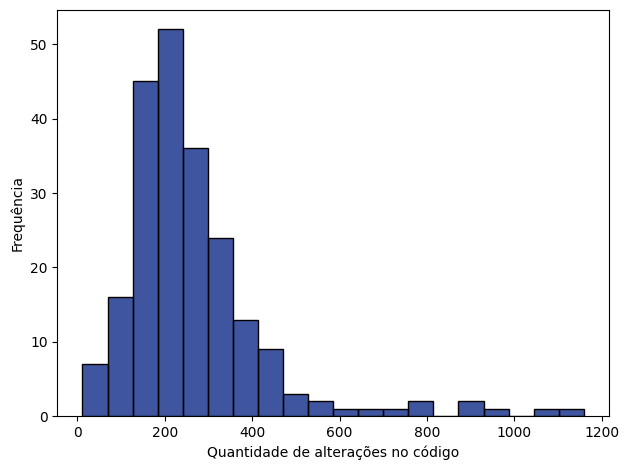

In [13]:
hst = sns.histplot(data=dep_vars['qtd_alteracoes_codigo'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Quantidade de alterações no código')
hst.set_ylabel('Frequência')


plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

## Funções auxiliares

In [14]:
# Classificador de questões
def ternary_classify(rows, bounds):
    if len(bounds) != 2:
        raise Exception('quartiles must have 2 values, {} were given'.format(len(bounds)))
        
    values = ('facil', 'medio', 'dificil')

    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1] if row <= bounds[1] else
                      values[2]
                     )
    
def get_bounds_ternary(rows, column_name):
    if column_name == 'taxa de erro':
        # Classificação do INEP
        q1 = 20.0  # Primeiro quartil (25%)
        q3 = 40.0 # Terceiro quartil (75%)
        return (q1, q3)
        #return (60.0, 85.0)


    else:
        return np.quantile(rows, q=[1/3, 2/3], method='midpoint')

In [15]:
def binary_classify(rows, bounds,  custom_classes=None):
    if len(bounds) != 1:
        raise Exception('bounds must have 1 value, {} were given'.format(len(bounds)))
        
    # Classes padrão ou personalizadas
    values = custom_classes if custom_classes else ('facil', 'dificil')

    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1])

    
def get_bounds_binary(rows, column_name):
    if column_name == 'taxa de erro':
        # Classificação do INEP
        return (40.0,)
    if column_name == 'discriminacao':
        # Classificação do INEP
        return (0.09,)
    else:
        return np.quantile(rows, q=[0.5], method='midpoint')

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cnf_matrix, title, binary=True, base_dir="Figures", regression_dir="Regression", discriminacao=False):
    """
    Plota a matriz de confusão, exibe o gráfico e o salva em uma pasta específica baseada no valor de `binary` e `discriminacao`.

    Parameters:
        cnf_matrix (array-like): A matriz de confusão.
        title (str): O título do gráfico.
        binary (bool): Define a subpasta e o nome do arquivo. True -> Regression/2, False -> Regression/3.
        base_dir (str): O diretório base para salvar os gráficos. Padrão é "Figures".
        regression_dir (str): O subdiretório base "Regression".
        discriminacao (bool): Define se as classes são 'fraco' e 'muito fraco'. Substitui o valor de `binary` se True.
    """
    # Configurar as classes com base nos parâmetros
    if discriminacao:
        classes = ['muito fraco', 'fraco']
        sub_dir = os.path.join(regression_dir, "discriminacao")
        file_name = "matriz_confusao_discriminacao.png"
    else:
        classes = ['fácil', 'difícil'] if binary else ['fácil', 'médio', 'difícil']
        sub_dir = os.path.join(regression_dir, "2" if binary else "3")
        file_name = f"matriz_confusao_{'2' if binary else '3'}.png"

    # Criar o caminho completo
    full_sub_dir = os.path.join(base_dir, sub_dir)
    os.makedirs(full_sub_dir, exist_ok=True)
    
    file_path = os.path.join(full_sub_dir, file_name)

    # Configurar o estilo e criar o gráfico
    plt.figure()
    plt.style.use('default')
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    # Configurar os ticks e rótulos
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Adicionar valores na matriz
    fmt = 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe predita')
    plt.xlabel('Classe verdadeira')

    # Salvar o gráfico no arquivo especificado
    plt.savefig(file_path, bbox_inches='tight')

    # Informar onde o arquivo foi salvo
    print(f"Gráfico salvo em: {file_path}")

    plt.show()


In [17]:
def relative_squared_error(y_true, y_pred):
    return np.sum(np.square(np.subtract(y_true,y_pred))) / np.sum(np.square(np.subtract(y_true, np.mean(y_true))))



def relative_absolute_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

def r2_adjusted(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

In [18]:
def cross_val_train(ind_vars, y, model, binary_class):    
    # Escolha das funções de classificação
    bounds_fn = get_bounds_binary if binary_class else get_bounds_ternary
    classify_fn = binary_classify if binary_class else ternary_classify
    
    predicted_list = []
    tested_list = []
    
    cat_predicted_list = []
    cat_tested_list = []
    
    n_folds = 4
    kf = KFold(n_folds, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(ind_vars):
        X_train, X_test = ind_vars.iloc[train_index], ind_vars.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Limites e classificação personalizados para 'discriminacao'
        if y.name == 'discriminacao':
            bounds = get_bounds_binary(y_train, y_train.name)
            classify = lambda rows, b: binary_classify(rows, b, custom_classes=('muito fraco', 'fraco'))
        else:
            bounds = bounds_fn(y_train, y_train.name)
            classify = classify_fn
        
        y_true = classify(y_test, bounds)
        
        model.fit(X_train, y_train)
    
        y_pred = pd.Series(model.predict(X_test))
        classified_pred = classify(y_pred, bounds)
        
        predicted_list = np.append(predicted_list, y_pred)
        tested_list = np.append(tested_list, y_test)
        
        cat_predicted_list = np.append(cat_predicted_list, classified_pred)
        cat_tested_list = np.append(cat_tested_list, y_true)
    
    final_scores = {}
    final_scores['mae'] = mean_absolute_error(tested_list, predicted_list)
    final_scores['rae'] = relative_absolute_error(tested_list, predicted_list)
    final_scores['rse'] = relative_squared_error(tested_list, predicted_list)
    final_scores['r2'] = r2_score(tested_list, predicted_list)
    
    # Classes personalizadas apenas para 'discriminacao'
    if y.name == 'discriminacao':
        classes = ('muito fraco', 'fraco')
    else:
        classes = ('facil', 'dificil') if binary_class else ('facil', 'medio', 'dificil')
    
    cnf_matrix = confusion_matrix(cat_tested_list, cat_predicted_list, labels=classes)
        
    return final_scores, cnf_matrix


In [19]:
def model_train_search_cv(
        df, dep_vars, model, model_class, distributions, n_iter,
        transform_fn=None, transform_by_column=False, binary_class=True
    ):
    # Definindo as colunas para os resultados
    results_col = ['mae', 'rae', 'rse', 'r2']
    
    # Garantindo que o DataFrame 'results' use float64
    results = pd.DataFrame(0, index=dep_vars.columns, columns=results_col, dtype=np.float64)
    cnf_matrixes = {}
    
    # Aplicando a transformação se necessário
    transformed_df = df.copy()
    if transform_fn and not transform_by_column:
        transformed_df = pd.DataFrame(transform_fn(transformed_df))
        
    # Validando o DataFrame transformado
    assert np.isfinite(transformed_df.values).all(), "Dados de entrada contêm valores inválidos (NaN ou Inf)."
    
    # Iterando pelas colunas do DataFrame de variáveis dependentes
    for col in dep_vars.columns:
        if transform_fn and transform_by_column:
            transformed_df = pd.DataFrame(transform_fn(df, col))
        
        # Verificando valores na variável dependente
        assert np.isfinite(dep_vars[col].values).all(), f"A variável dependente '{col}' contém valores inválidos (NaN ou Inf)."
        
        # RandomizedSearchCV para busca de hiperparâmetros
        clf = RandomizedSearchCV(
            estimator=model, 
            param_distributions=distributions, 
            random_state=42, 
            cv=4, 
            n_iter=n_iter, 
            n_jobs=-1,
            scoring='neg_mean_absolute_error',
            return_train_score=True
        )
        
        # Ajustando o modelo
        search = clf.fit(transformed_df, dep_vars[col])
        best_params = {key.split('__')[-1]: value for key, value in search.best_params_.items()}
        print('best params for {}: {}'.format(col, best_params))
        
        # Criando o modelo com os melhores parâmetros
        best_model = model_class(**best_params)
        
        # Treinando com validação cruzada
        metric_train_result, cnf_matrix = cross_val_train(df, dep_vars[col], best_model, binary_class)
        
        # Convertendo explicitamente para float para evitar problemas de compatibilidade
        # Substituindo NaN ou Inf por 0
        results.loc[col] = [float(np.nan_to_num(metric_train_result.get(k, 0), nan=0, posinf=0, neginf=0)) for k in results_col]
        
        cnf_matrixes[col] = cnf_matrix
        
    # Retornando os resultados ordenados e as matrizes de confusão
    return results.sort_values(by=['r2', 'rse'], ascending=False), cnf_matrixes


In [20]:
def push_results(results, df_results: pd.DataFrame, model):
    results[model] = dict()
    for dep_var, metrics in df_results.iterrows():
        results[model][dep_var] = metrics

In [21]:
results = dict()

### Árvore de Regressão

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

criterion = ['squared_error', 'friedman_mse', 'absolute_error']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2', None]  # Adicionado 'None'
random_state = [42, 0, 7]  # Adicionados mais valores

# Espaço de busca expandido
distributions = dict(
    criterion=criterion,
    splitter=splitter,
    max_features=max_features,
    random_state=random_state
)

model = DecisionTreeRegressor(random_state=42)
ans, cnf_matrixes_dtr = model_train_search_cv(ind_vars, dep_vars, model, DecisionTreeRegressor, distributions, n_iter_DecisionTreeRegressor, binary_class=binary)
push_results(results, ans, 'Regression Tree')
ans

best params for num_submissoes: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}
best params for taxa_aceitacao: {'splitter': 'best', 'random_state': 42, 'max_features': None, 'criterion': 'absolute_error'}
best params for num_testes: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}
best params for num_consultas: {'splitter': 'best', 'random_state': 42, 'max_features': None, 'criterion': 'squared_error'}
best params for num_erros: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}
best params for num_eventos: {'splitter': 'best', 'random_state': 0, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_eventos_del: {'splitter': 'random', 'random_state': 42, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}
best params for tempo_implementacao: {'splitter': 'best', 'random_state': 0, 'max_features': 'log2', 'criterion': 'absolut

,mae,rae,rse,r2
num_testes,4.357152,1.191024,1.349249,-0.349249
num_consultas,5.694795,1.232234,1.378628,-0.378628
num_submissoes,1.594321,1.285077,1.410424,-0.410424
num_eventos,591.713339,1.220513,1.427308,-0.427308
qtd_alteracoes_codigo,134.958781,1.208631,1.469488,-0.469488
num_erros,1.673649,1.327023,1.487115,-0.487115
num_eventos_del,32.842321,1.258120,1.522486,-0.522486
tempo_implementacao,100.191985,1.215909,1.592619,-0.592619
taxa_aceitacao,0.160898,1.269931,1.594075,-0.594075
discriminacao,0.053690,1.212261,1.624446,-0.624446


In [24]:
cnf_matrixes_dtr['discriminacao']

array([[53, 62],
       [49, 53]], dtype=int64)

In [25]:
cnf_matrixes_dtr['taxa de erro']

array([[205,   5],
       [  6,   1]], dtype=int64)

Gráfico salvo em: Figures\Regression\discriminacao\matriz_confusao_discriminacao.png


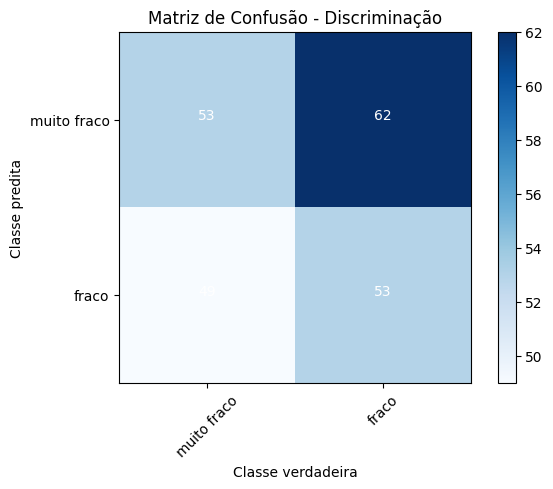

In [26]:
plot_confusion_matrix(cnf_matrixes_dtr['discriminacao'], 'Matriz de Confusão - Discriminação', discriminacao=True)


### SVR

In [27]:
from sklearn.svm import SVR

In [28]:
kernel = ['rbf', 'poly']
degree = [2,3]
tol = np.linspace(start=1e-5, stop=1e-3, num=10)
epsilon = np.linspace(start=1e-3, stop=1, num=10)
C = np.linspace(start=1, stop=1000, num=10)

distributions = dict(
    kernel = kernel,
    degree = degree,
    tol = tol,
    epsilon = epsilon,
    C = C,
)
distributions

{'kernel': ['rbf', 'poly'],
 'degree': [2, 3],
 'tol': array([1.0e-05, 1.2e-04, 2.3e-04, 3.4e-04, 4.5e-04, 5.6e-04, 6.7e-04,
        7.8e-04, 8.9e-04, 1.0e-03]),
 'epsilon': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
        1.   ]),
 'C': array([   1.,  112.,  223.,  334.,  445.,  556.,  667.,  778.,  889.,
        1000.])}

In [29]:
model = SVR()

In [30]:
ans, cnf_matrixes_svr = model_train_search_cv(ind_vars, dep_vars, model, SVR, distributions, n_iter_SVR, binary_class=binary)
push_results(results, ans, 'SVR')
ans

best params for num_submissoes: {'tol': 0.00045000000000000004, 'kernel': 'poly', 'epsilon': 0.445, 'degree': 2, 'C': 334.0}
best params for taxa_aceitacao: {'tol': 1e-05, 'kernel': 'rbf', 'epsilon': 0.334, 'degree': 2, 'C': 223.0}
best params for num_testes: {'tol': 1e-05, 'kernel': 'rbf', 'epsilon': 0.334, 'degree': 2, 'C': 223.0}
best params for num_consultas: {'tol': 1e-05, 'kernel': 'rbf', 'epsilon': 0.334, 'degree': 2, 'C': 223.0}
best params for num_erros: {'tol': 0.00045000000000000004, 'kernel': 'poly', 'epsilon': 0.445, 'degree': 2, 'C': 334.0}
best params for num_eventos: {'tol': 1e-05, 'kernel': 'rbf', 'epsilon': 0.334, 'degree': 2, 'C': 223.0}
best params for num_eventos_del: {'tol': 1e-05, 'kernel': 'rbf', 'epsilon': 0.334, 'degree': 2, 'C': 223.0}
best params for tempo_implementacao: {'tol': 1e-05, 'kernel': 'rbf', 'epsilon': 0.334, 'degree': 2, 'C': 223.0}
best params for qtd_alteracoes_codigo: {'tol': 1e-05, 'kernel': 'rbf', 'epsilon': 0.334, 'degree': 2, 'C': 223.0}
b

,mae,rae,rse,r2
num_submissoes,1.281106,1.032616,1.040300,-0.040300
num_erros,1.303520,1.033551,1.041198,-0.041198
qtd_alteracoes_codigo,105.559275,0.945342,1.041408,-0.041408
num_eventos,472.271315,0.974142,1.056037,-0.056037
num_eventos_del,25.457232,0.975213,1.057187,-0.057187
num_testes,3.719181,1.016635,1.084251,-0.084251
num_consultas,4.716741,1.020603,1.086205,-0.086205
discriminacao,0.046682,1.054034,1.102207,-0.102207
tempo_implementacao,81.995430,0.995079,1.104663,-0.104663
taxa de erro,8.262508,1.071450,1.142492,-0.142492


### NuSVR

In [31]:
from sklearn.svm import NuSVR

In [32]:
nu = np.linspace(start=0.1, stop=0.5, num=10)
C = np.linspace(start=1, stop=100, num=10)
kernel = ['rbf', 'poly']
degree = [2,3]
         
distributions = dict(
    nu = nu,
    C = C,
    kernel = kernel,
    degree = degree,
)
distributions 

{'nu': array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
        0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ]),
 'C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
 'kernel': ['rbf', 'poly'],
 'degree': [2, 3]}

In [33]:
model = NuSVR()

In [34]:
ans, cnf_matrixes_nsvr = model_train_search_cv(ind_vars, dep_vars, model, NuSVR, distributions, n_iter_NuSVR, binary_class=binary)
push_results(results, ans, 'NuSVR')
ans

best params for num_submissoes: {'nu': 0.23333333333333334, 'kernel': 'poly', 'degree': 3, 'C': 1.0}
best params for taxa_aceitacao: {'nu': 0.23333333333333334, 'kernel': 'poly', 'degree': 2, 'C': 23.0}
best params for num_testes: {'nu': 0.23333333333333334, 'kernel': 'poly', 'degree': 3, 'C': 1.0}
best params for num_consultas: {'nu': 0.23333333333333334, 'kernel': 'poly', 'degree': 3, 'C': 1.0}
best params for num_erros: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 56.0}
best params for num_eventos: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 56.0}
best params for num_eventos_del: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 56.0}
best params for tempo_implementacao: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 56.0}
best params for qtd_alteracoes_codigo: {'nu': 0.5, 'kernel': 'rbf', 'degree': 2, 'C': 56.0}
best params for taxa de erro: {'nu': 0.23333333333333334, 'kernel': 'poly', 'degree': 3, 'C': 1.0}
best params for discriminacao: {'nu': 0.23333333333333334, 'kernel': 'p

,mae,rae,rse,r2
num_testes,3.716123,1.015799,1.004880,-0.004880
num_submissoes,1.273684,1.026633,1.010470,-0.010470
qtd_alteracoes_codigo,106.892445,0.957282,1.012105,-0.012105
num_erros,1.266768,1.004411,1.019289,-0.019289
num_consultas,4.829441,1.044989,1.027432,-0.027432
num_eventos,473.475396,0.976626,1.036255,-0.036255
taxa de erro,7.951128,1.031072,1.036403,-0.036403
tempo_implementacao,81.126326,0.984532,1.037777,-0.037777
num_eventos_del,25.727958,0.985584,1.049749,-0.049749
taxa_aceitacao,0.130482,1.029869,1.083406,-0.083406


### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = np.linspace(start=100, stop=1000, num=10, dtype=int)
criterion = ['squared_error', 'absolute_error']
max_features = ['sqrt', 'log2', None]
random_state = [42]

distributions = dict(
    n_estimators = n_estimators,
    criterion = criterion,
    max_features = max_features,
    random_state = random_state
)
distributions

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'criterion': ['squared_error', 'absolute_error'],
 'max_features': ['sqrt', 'log2', None],
 'random_state': [42]}

In [36]:
model = RandomForestRegressor()

In [37]:
ans, cnf_matrixes_rfr = model_train_search_cv(ind_vars, dep_vars, model, RandomForestRegressor, distributions, n_iter_RandomForestRegressor, binary_class=binary)
push_results(results, ans, 'Random Forest')
ans

best params for num_submissoes: {'random_state': 42, 'n_estimators': 700, 'max_features': 'sqrt', 'criterion': 'absolute_error'}
best params for taxa_aceitacao: {'random_state': 42, 'n_estimators': 600, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_testes: {'random_state': 42, 'n_estimators': 700, 'max_features': 'sqrt', 'criterion': 'absolute_error'}
best params for num_consultas: {'random_state': 42, 'n_estimators': 600, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_erros: {'random_state': 42, 'n_estimators': 600, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_eventos: {'random_state': 42, 'n_estimators': 600, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_eventos_del: {'random_state': 42, 'n_estimators': 600, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for tempo_implementacao: {'random_state': 42, 'n_estimators': 600, 'max_features': 'log2', 'crite

,mae,rae,rse,r2
num_testes,3.937079,1.076197,1.098935,-0.098935
num_consultas,5.012860,1.084677,1.125871,-0.125871
num_eventos,519.406089,1.071366,1.140135,-0.140135
qtd_alteracoes_codigo,120.207229,1.076523,1.154739,-0.154739
tempo_implementacao,87.929132,1.067089,1.178838,-0.178838
num_eventos_del,28.344585,1.085821,1.182172,-0.182172
num_erros,1.437336,1.139653,1.185775,-0.185775
num_submissoes,1.425802,1.149245,1.189034,-0.189034
taxa_aceitacao,0.138927,1.096526,1.217015,-0.217015
taxa de erro,8.748509,1.134473,1.233524,-0.233524


In [38]:
cnf_matrixes_rfr

{'num_submissoes': array([[45, 64],
        [40, 68]], dtype=int64),
 'taxa_aceitacao': array([[45, 62],
        [47, 63]], dtype=int64),
 'num_testes': array([[50, 58],
        [43, 66]], dtype=int64),
 'num_consultas': array([[49, 56],
        [45, 67]], dtype=int64),
 'num_erros': array([[44, 64],
        [40, 69]], dtype=int64),
 'num_eventos': array([[52, 59],
        [40, 66]], dtype=int64),
 'num_eventos_del': array([[47, 59],
        [42, 69]], dtype=int64),
 'tempo_implementacao': array([[45, 65],
        [36, 71]], dtype=int64),
 'qtd_alteracoes_codigo': array([[49, 57],
        [47, 64]], dtype=int64),
 'taxa de erro': array([[210,   0],
        [  7,   0]], dtype=int64),
 'discriminacao': array([[57, 58],
        [52, 50]], dtype=int64)}

### XGB

In [39]:
from xgboost import XGBRegressor

In [40]:
model = XGBRegressor()

In [41]:
n_estimators = np.linspace(start=100, stop=500, num=10, dtype=int)
max_depth = np.linspace(start=3, stop=15, num=15, dtype=int)
eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsample = np.linspace(start=0.1, stop=1.0, num=10, dtype=np.float64)
distributions = dict(n_estimators=n_estimators, max_depth=max_depth, eta=eta, subsample=subsample)
distributions

{'n_estimators': array([100, 144, 188, 233, 277, 322, 366, 411, 455, 500]),
 'max_depth': array([ 3,  3,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 13, 14, 15]),
 'eta': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [42]:
ans, cnf_matrixes_xbgr = model_train_search_cv(ind_vars, dep_vars, model, XGBRegressor, distributions, n_iter_XGBRegressor, binary_class=binary)
push_results(results, ans, model='Extreme Gradient Boosting')
ans

best params for num_submissoes: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for taxa_aceitacao: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for num_testes: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for num_consultas: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for num_erros: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for num_eventos: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for num_eventos_del: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for tempo_implementacao: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for qtd_alteracoes_codigo: {'subsample': 0.1, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for taxa de erro: {'subsample': 0.1, 'n_estimators': 366, 'ma

,mae,rae,rse,r2
tempo_implementacao,82.718615,1.003856,1.003786,-0.003786
discriminacao,0.044425,1.003074,1.006741,-0.006741
num_submissoes,1.255911,1.012308,1.012242,-0.012242
num_erros,1.276323,1.011987,1.012537,-0.012537
qtd_alteracoes_codigo,112.522118,1.007699,1.014110,-0.014110
num_testes,3.699255,1.011188,1.014761,-0.014761
num_consultas,4.681513,1.012981,1.017610,-0.017610
taxa de erro,7.755334,1.005682,1.018128,-0.018128
num_eventos_del,26.417513,1.011999,1.018309,-0.018309
num_eventos,489.119898,1.008896,1.018898,-0.018898


## Resultados

In [43]:
n, k = ind_vars.shape[0], dep_vars.shape[1]
columns = ['classificador', 'r2_adjusted', 'mae', 'rae', 'rse', 'r2']
best_metrics = pd.DataFrame(-np.inf, index=dep_vars.columns, columns=columns)
for model, metrics in results.items():
    for metric, data in metrics.items():
        cur = best_metrics.loc[metric]
        r2_adjusted_score = r2_adjusted(data['r2'], n, k)
        if r2_adjusted_score > cur['r2_adjusted']:
            best_metrics.loc[metric] = model, r2_adjusted_score, *data
best_metrics.sort_values(by=['r2_adjusted'], ascending=False)

C:\Users\thiag\AppData\Local\Temp\ipykernel_27872\3756411867.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Regression Tree' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  best_metrics.loc[metric] = model, r2_adjusted_score, *data


,classificador,r2_adjusted,mae,rae,rse,r2
tempo_implementacao,Extreme Gradient Boosting,-0.057648,82.718615,1.003856,1.003786,-0.003786
num_testes,NuSVR,-0.058801,3.716123,1.015799,1.004880,-0.004880
discriminacao,Extreme Gradient Boosting,-0.060761,0.044425,1.003074,1.006741,-0.006741
num_submissoes,NuSVR,-0.064691,1.273684,1.026633,1.010470,-0.010470
qtd_alteracoes_codigo,NuSVR,-0.066413,106.892445,0.957282,1.012105,-0.012105
num_erros,Extreme Gradient Boosting,-0.066868,1.276323,1.011987,1.012537,-0.012537
num_consultas,Extreme Gradient Boosting,-0.072213,4.681513,1.012981,1.017610,-0.017610
taxa de erro,Extreme Gradient Boosting,-0.072759,7.755334,1.005682,1.018128,-0.018128
num_eventos_del,Extreme Gradient Boosting,-0.072950,26.417513,1.011999,1.018309,-0.018309
num_eventos,Extreme Gradient Boosting,-0.073570,489.119898,1.008896,1.018898,-0.018898


In [44]:
import os

def save_best_metrics_to_csv(best_metrics, base_dir="Regression_CSV", file_name="best_metrics.csv"):
    """
    Salva o DataFrame 'best_metrics' em um arquivo CSV com uma nova coluna 'metricas',
    que conterá os valores do índice atual do DataFrame.

    Parameters:
        best_metrics (pd.DataFrame): O DataFrame contendo as métricas com índice como 'qtd_alteracoes_codigo', etc.
        base_dir (str): O diretório base onde o arquivo CSV será salvo. Padrão é "Regression_CSV".
        file_name (str): O nome do arquivo CSV. Padrão é "best_metrics.csv".
        binary (bool): Determina a subpasta a ser usada. Se True, cria a subpasta "2", se False, cria "3".
    """
    # Determinar a subpasta com base no valor de `binary`
    sub_dir = "2" if binary else "3"

    # Criar o caminho completo
    full_sub_dir = os.path.join(base_dir, sub_dir)
    os.makedirs(full_sub_dir, exist_ok=True)

    # Caminho completo para o arquivo CSV
    csv_file_path = os.path.join(full_sub_dir, file_name)

    # Resetar o índice e transformá-lo na coluna 'metricas'
    best_metrics = best_metrics.reset_index()
    best_metrics.rename(columns={'index': 'metricas'}, inplace=True)

    best_metrics = best_metrics.round(2)

    # Salvar o DataFrame como CSV
    best_metrics.to_csv(csv_file_path, index=False)

    # Imprimir o caminho onde o arquivo foi salvo
    print(f"Arquivo CSV salvo em: {csv_file_path}")


In [45]:


save_best_metrics_to_csv(best_metrics, base_dir="Regression_CSV", file_name="Best_Metrics_Regression.csv")


Arquivo CSV salvo em: Regression_CSV\2\Best_Metrics_Regression.csv


In [46]:
import pandas as pd

def read_best_metrics(file_path):
    """
    Lê o arquivo CSV de métricas e retorna um DataFrame.

    Parameters:
        file_path (str): O caminho completo para o arquivo CSV.

    Returns:
        pd.DataFrame: O DataFrame contendo os dados do arquivo CSV.
    """
    try:
        # Ler o arquivo CSV
        best_metrics = pd.read_csv(file_path)

        return best_metrics
    except FileNotFoundError:
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")




In [47]:
file_path = r"Regression_CSV\2\Best_Metrics_Regression.csv"
if os.path.exists(file_path):

    best_metrics_df = read_best_metrics(file_path)
    display(best_metrics_df)

,metricas,classificador,r2_adjusted,mae,rae,rse,r2
0,num_submissoes,NuSVR,-0.06,1.27,1.03,1.01,-0.01
1,taxa_aceitacao,Extreme Gradient Boosting,-0.08,0.13,1.02,1.03,-0.03
2,num_testes,NuSVR,-0.06,3.72,1.02,1.00,-0.00
3,num_consultas,Extreme Gradient Boosting,-0.07,4.68,1.01,1.02,-0.02
4,num_erros,Extreme Gradient Boosting,-0.07,1.28,1.01,1.01,-0.01
5,num_eventos,Extreme Gradient Boosting,-0.07,489.12,1.01,1.02,-0.02
6,num_eventos_del,Extreme Gradient Boosting,-0.07,26.42,1.01,1.02,-0.02
7,tempo_implementacao,Extreme Gradient Boosting,-0.06,82.72,1.00,1.00,-0.00
8,qtd_alteracoes_codigo,NuSVR,-0.07,106.89,0.96,1.01,-0.01
9,taxa de erro,Extreme Gradient Boosting,-0.07,7.76,1.01,1.02,-0.02


In [48]:
file_path_2 = r"Regression_CSV\3\Best_Metrics_Regression.csv"
if os.path.exists(file_path_2):
    best_metrics_df = read_best_metrics(file_path_2)
    display(best_metrics_df)


   